# Clean Water

### About

- `ph`: pH of 1. water (0 to 14).

- `Hardness`: Capacity of water to precipitate soap in mg/L.

- `Solids`: Total dissolved solids in ppm.

- `Chloramines`: Amount of Chloramines in ppm.

- `Sulfate`: Amount of Sulfates dissolved in mg/L.

- `Conductivity`: Electrical conductivity of water in μS/cm.

- `Organic_carbon`: Amount of organic carbon in ppm.

- `Trihalomethanes`: Amount of Trihalomethanes in μg/L.

- `Turbidity`: Measure of light emiting property of water in NTU.

- `Potability`: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

### Workflow

- Duplicates
- Missing data
- Outliers
- Scaling
- Balancing
- Encoding
- Discretising
- Feature creation
- Feature selection

## 1. Data & Libraries

In [1]:
# data analysis and wrangling
import numpy as np 
import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('../data/water_potability.csv')

In [3]:
# display top 5 rows
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## 2. Exploratory Data Analysis

In [4]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# dataframe size
df.shape

(3276, 10)

In [6]:
# drop duplicates
df.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
# missing data
df.isnull().sum() / len(df) * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [8]:
# drop null values & rename df to data
data = df.dropna()

# checking shape after dropping na
data.shape

(2011, 10)

In [9]:
# descriptive statistics
round(data.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.09,1.57,0.23,6.09,7.03,8.05,14.00
Hardness,2011.0,195.97,32.64,73.49,176.74,197.19,216.44,317.34
Solids,2011.0,21917.44,8642.24,320.94,15615.67,20933.51,27182.59,56488.67
Chloramines,2011.0,7.13,1.58,1.39,6.14,7.14,8.11,13.13
Sulfate,2011.0,333.22,41.21,129.00,307.63,332.23,359.33,481.03
Conductivity,2011.0,426.53,80.71,201.62,366.68,423.46,482.37,753.34
Organic_carbon,2011.0,14.36,3.32,2.20,12.12,14.32,16.68,27.01
Trihalomethanes,2011.0,66.40,16.08,8.58,55.95,66.54,77.29,124.00
Turbidity,2011.0,3.97,0.78,1.45,3.44,3.97,4.51,6.49
Potability,2011.0,0.40,0.49,0.00,0.00,0.00,1.00,1.00


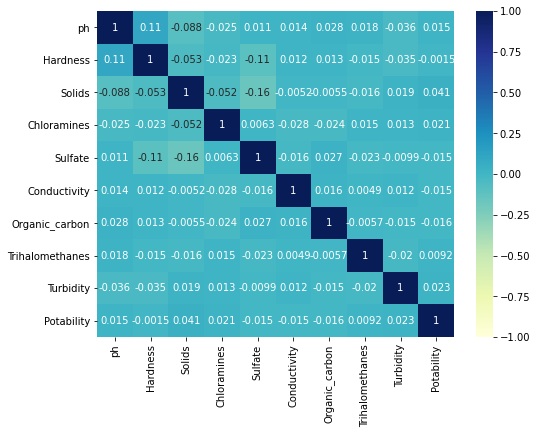

In [10]:
# correlation and heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu");

## 3. Modelling

In [11]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Create the feature set
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
          'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = data['Potability']

# Instanciate model
model = LogisticRegression(max_iter=1000)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=10)

# Mean of accuracies
accuracy = cv_results['test_score'].mean()

accuracy

0.5967193734298804

### Principal Component Analysis

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

# find all Principal Components PC
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# Print the PCs (as rows)
# Expressed as linear combination of initial vector basis
Wt = pd.DataFrame(pca.components_)
Wt

,0,1,2,3,4,5,6,7,8
0,-0.000016,-0.000201,9.999997e-01,-0.000009,-0.000776,-0.000049,-0.000002,-0.000029,0.000002
1,0.000272,0.005873,4.056138e-05,-0.000562,-0.011847,0.999912,0.000639,0.001021,0.000121
2,0.000896,0.242068,-7.045194e-04,-0.000077,-0.970118,-0.012925,-0.001879,0.010118,-0.000006
3,0.005022,0.970134,3.823773e-04,-0.001281,0.241940,-0.002819,0.002188,-0.016262,-0.000867
4,-0.001931,-0.013317,-4.250188e-05,-0.001350,-0.013767,0.000935,0.000987,-0.999812,0.001043
5,0.016010,-0.001761,6.210314e-08,-0.014366,-0.002340,-0.000669,0.999756,0.001026,-0.003778
6,-0.503908,0.003635,1.180261e-06,0.863338,0.000324,0.000589,0.020547,-0.000207,0.016976
7,-0.863364,0.003789,-1.758824e-05,-0.504351,0.000201,-0.000076,0.006633,0.002316,0.013011
8,-0.019859,-0.000738,1.177006e-06,0.008150,-0.000203,0.000136,-0.003344,-0.001006,-0.999763


In [15]:
Xp = pca.transform(X) # Dataset expressed/projected in the new PC basis.  (eq. X.dot(Wt.T))
pd.DataFrame(Xp)

,0,1,2,3,4,5,6,7,8
0,100.956014,-63.385249,-17.415811,23.258611,-34.567655,4.071161,0.303760,-1.337358,-0.750474
1,-3938.430506,-28.122688,21.597390,-20.871345,35.047600,-2.695109,-1.649720,-1.522086,-0.098790
2,6831.258233,-145.752257,1.466398,-5.819271,11.240941,-5.865928,0.859307,0.865888,1.469432
3,6832.221926,-142.976285,-48.798879,67.904463,-20.157671,-0.636609,-1.158551,-2.778510,1.158620
4,-8245.327441,48.137322,35.967146,-3.288410,4.309623,-1.912698,-2.998008,0.106167,-0.475567
...,...,...,...,...,...,...,...,...,...
2006,-5996.013435,-36.017083,28.892320,11.593273,11.569519,-4.391367,-1.725936,-1.092608,-0.684229
2007,-4670.493705,-97.072033,34.768609,3.167079,37.868121,1.920259,0.694762,0.087090,0.549132
2008,15271.457700,14.247308,36.404772,-109.880369,26.561795,2.171512,-0.698475,-5.584868,-0.341105
2009,4221.330348,-10.677987,-17.249878,-4.281909,5.741229,-2.325037,0.959565,0.429084,0.346659


In [16]:
# compute it
df_Xp = pd.DataFrame(Xp)

df_Xp.std()**2 / ((df_Xp.std()**2).sum()) * 1000

0    999.872764
1      0.087221
2      0.022646
3      0.013693
4      0.003455
5      0.000148
6      0.000034
7      0.000032
8      0.000008
dtype: float64

In [17]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([9.99872764e-01, 8.72207506e-05, 2.26463792e-05, 1.36926771e-05,
       3.45466875e-06, 1.47868154e-07, 3.39597054e-08, 3.19791812e-08,
       8.12017301e-09])

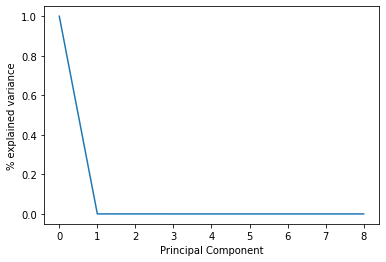

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

### Modelling after PCA

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression()

print("accuracy all features")
cross_val_score(model, X, y, cv=10).mean()

accuracy all features


0.5967193734298804

In [20]:
pca2 = PCA(n_components=2).fit(X)

# Print our 2 principal components
pd.DataFrame(pca2.components_)

,0,1,2,3,4,5,6,7,8
0,-0.000016,-0.000201,1.000000,-0.000009,-0.000776,-0.000049,-0.000002,-0.000029,0.000002
1,0.000272,0.005873,0.000041,-0.000562,-0.011847,0.999912,0.000639,0.001021,0.000121


In [21]:
Xp2 = pca2.fit_transform(X)
pd.DataFrame(Xp2)

,0,1
0,100.956014,-63.385249
1,-3938.430506,-28.122688
2,6831.258233,-145.752257
3,6832.221926,-142.976285
4,-8245.327441,48.137322
...,...,...
2006,-5996.013435,-36.017083
2007,-4670.493705,-97.072033
2008,15271.457700,14.247308
2009,4221.330348,-10.677987


In [22]:
print("accuracy 2 features")
cross_val_score(model, Xp2, y, cv=10).mean()

accuracy 2 features


0.5967193734298804